<a href="https://colab.research.google.com/github/Whoseyashar/Machine-Learning-Advance/blob/main/Copy_of_Master_Data_Science_Advanced_ML_Adversarial_ML_25_09_2024_Practical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Part 0: Installs and imports

In [1]:
!pip uninstall -y tf-keras
!pip install tensorflow==2.8.1
!pip install adversarial-robustness-toolbox

Found existing installation: tf_keras 2.17.0
Uninstalling tf_keras-2.17.0:
  Successfully uninstalled tf_keras-2.17.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.0/498.0 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.3/462.3 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 27.1 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully unins

In [2]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
import numpy as np
from matplotlib import pyplot as plt

from art.estimators.classification import KerasClassifier
from art.attacks.evasion import FastGradientMethod, CarliniLInfMethod, CarliniL2Method , ProjectedGradientDescentTensorFlowV2, AutoProjectedGradientDescent,ProjectedGradientDescent


# Part 1 : Building a Model

In [10]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

category_loss_from_logits = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(10, activation='linear')
])

model.compile(optimizer='adam',
              loss=category_loss_from_logits,
              metrics=['accuracy']);

In [12]:
model.fit(x_train, y_train, epochs=5);

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2912 - accuracy: 0.9159
Epoch 2/5
60000/60000 [==============================] - 6s 96us/sample - loss: 0.1396 - accuracy: 0.9589
Epoch 3/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.1047 - accuracy: 0.9681
Epoch 4/5
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0845 - accuracy: 0.9741
Epoch 5/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.0751 - accuracy: 0.9769


In [13]:
loss_test, accuracy_test = model.evaluate(x_test, y_test)
print('Accuracy on test data: {:4.2f}%'.format(accuracy_test * 100))

Accuracy on test data: 97.74%


In [14]:
#1/ Train for 5 epochs a model called "model1" that has only one hidden layer of 64 neurons and only *linear* activations instead of ReLU;
#compare its accuracy with the first model


model1 = tf.keras.models.Sequential([
     tf.keras.layers.InputLayer(input_shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(10, activation='linear')
])



model1.compile(optimizer='adam',
              loss=category_loss_from_logits,
              metrics=['accuracy']);

model1.fit(x_train,y_train, epochs=5);


loss_test, accuracy_test = model1.evaluate(x_test, y_test)
print('Accuracy on test data: {:4.2f}%'.format(accuracy_test * 100))

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3631 - accuracy: 0.8940
Epoch 2/5
60000/60000 [==============================] - 6s 93us/sample - loss: 0.1947 - accuracy: 0.9424
Epoch 3/5
60000/60000 [==============================] - 4s 67us/sample - loss: 0.1564 - accuracy: 0.9542
Epoch 4/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.1329 - accuracy: 0.9596
Epoch 5/5
60000/60000 [==============================] - 5s 83us/sample - loss: 0.1211 - accuracy: 0.9633
Accuracy on test data: 97.21%


In [15]:
#2/ Train for 5 epochs a model called "model2" that has 5 dense layer of 128 neurons and a relu activation and no dropout; compare its accuracy with the first model

model2 = tf.keras.models.Sequential([
      tf.keras.layers.InputLayer(input_shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),

tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(10, activation='linear')

])

model2.compile(optimizer='adam',
              loss=category_loss_from_logits,
              metrics=['accuracy']);

model2.fit(x_train, y_train, epochs=5);
loss_test, accuracy_test = model2.evaluate(x_test, y_test)
print('Accuracy on test data: {:4.2f}%'.format(accuracy_test * 100))

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 100us/sample - loss: 0.2395 - accuracy: 0.9266
Epoch 2/5
60000/60000 [==============================] - 8s 128us/sample - loss: 0.1083 - accuracy: 0.9668
Epoch 3/5
60000/60000 [==============================] - 6s 99us/sample - loss: 0.0798 - accuracy: 0.9757
Epoch 4/5
60000/60000 [==============================] - 7s 119us/sample - loss: 0.0648 - accuracy: 0.9799
Epoch 5/5
60000/60000 [==============================] - 8s 131us/sample - loss: 0.0528 - accuracy: 0.9839
Accuracy on test data: 97.01%


In [16]:
#2bis/ (OPTIONAL CHALLENGE /!\) Train for 5 epochs a "model3" that obtains more 99% of accuracy on *test* data (hint: you might want to use 2D convolutional layers,i.e. tf.keras.layers.Conv2D(...), and MaxPool layers, i.e.  tf.keras.layers.MaxPooling2D(...))
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
     tf.keras.layers.InputLayer(input_shape=(28, 28, 1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),

tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(10, activation='linear')


])

model3.compile(optimizer='adam',
              loss=category_loss_from_logits,
              metrics=['accuracy']);

model3.fit(x_train, y_train, epochs=5);
loss_test, accuracy_test = model3.evaluate(x_test, y_test)
print('Accuracy on test data: {:4.2f}%'.format(accuracy_test * 100))

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 133us/sample - loss: 0.2321 - accuracy: 0.9283
Epoch 2/5
60000/60000 [==============================] - 6s 101us/sample - loss: 0.1069 - accuracy: 0.9672
Epoch 3/5
60000/60000 [==============================] - 8s 132us/sample - loss: 0.0770 - accuracy: 0.9755
Epoch 4/5
60000/60000 [==============================] - 6s 99us/sample - loss: 0.0640 - accuracy: 0.9803
Epoch 5/5
60000/60000 [==============================] - 8s 126us/sample - loss: 0.0508 - accuracy: 0.9843
Accuracy on test data: 97.84%


# Part 2: Simple Whitebox Adversarial Attacks

In [17]:
classifier = KerasClassifier(model=model, clip_values=(0, 1), use_logits=True, )
x_test = x_test[0:100]
y_test = y_test[0:100]

## FGSM attacks

In [18]:
attack_fgsm = FastGradientMethod(estimator=classifier, eps=16/255, norm=np.inf)

In [19]:
x_test_adv = attack_fgsm.generate(x_test)

In [20]:
loss_test, accuracy_test = model.evaluate(x_test_adv, y_test)
perturbation = np.mean(np.abs((x_test_adv - x_test)))

print('Accuracy on adversarial test data: {:4.2f}%'.format(accuracy_test * 100))
print('Average perturbation: {:4.2f}'.format(perturbation))

Accuracy on adversarial test data: 55.00%
Average perturbation: 0.04


predicted class of original image: 7


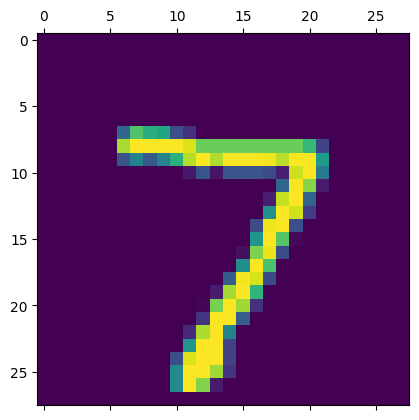

In [21]:
y_pred_0 = model.predict(x_test[0:1])
print(f"predicted class of original image: {y_pred_0.argmax()}")
plt.matshow(x_test[0])
plt.show()

predicted class of adversarial attack: 3


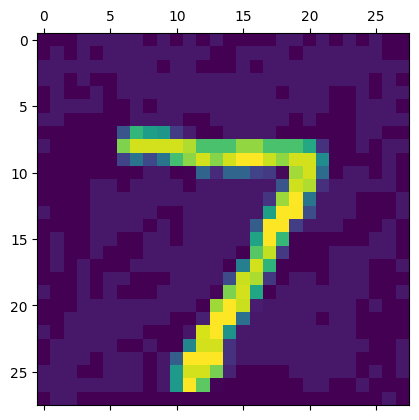

In [22]:
y_pred_0 = model.predict(x_test_adv[0:1])
print(f"predicted class of adversarial attack: {y_pred_0.argmax()}")
plt.matshow(x_test_adv[0])
plt.show()

Accuracy on adversarial test data: 22.00%
Average perturbation: 0.02946
predicted class of adversarial attack: 3


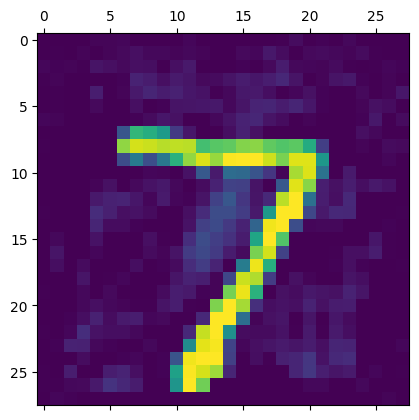

In [23]:
#3/ Run an FGSM attack on the norm Inf and 2 with EQUIVALENT epsilons, e.g. eps=4/255 for the norm Inf and eps=(16/255)*sqrt(784) for the l2 norm. Display the results. Which one leads to the best image?

attack_fgsm = FastGradientMethod(
    estimator=classifier , eps=(16/255)*np.sqrt(784), norm=2

)
x_test_adv = attack_fgsm.generate(x_test)

loss_test, accuracy_test = model.evaluate(x_test_adv, y_test)
perturbation = np.mean(np.abs((x_test_adv - x_test)))

print('Accuracy on adversarial test data: {:4.2f}%'.format(accuracy_test * 100))
print('Average perturbation: {:4.5f}'.format(perturbation))
y_pred_0 = model.predict(x_test_adv[0:1])
print(f"predicted class of adversarial attack: {y_pred_0.argmax()}")
plt.matshow(x_test_adv[0])
plt.show()

Accuracy on adversarial test data: 98.00%
Average perturbation: 0.00072
predicted class of adversarial attack: 7


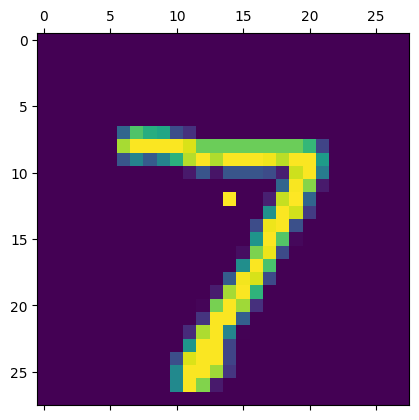

In [24]:
#3/ Run an FGSM attack on the norm Inf and 2 with EQUIVALENT epsilons, e.g. eps=16/255 for the norm Inf and eps=(16/255)*sqrt(784) for the l2 norm. Display the results. Which one leads to the best image?

attack_fgsm = FastGradientMethod(
         #fill missing code
         estimator=classifier , eps=(16/255)*np.sqrt(784), norm=1
         #even u can write np.inf norm=np.inf
)
x_test_adv = attack_fgsm.generate(x_test)

loss_test, accuracy_test = model.evaluate(x_test_adv, y_test)
perturbation = np.mean(np.abs((x_test_adv - x_test)))

print('Accuracy on adversarial test data: {:4.2f}%'.format(accuracy_test * 100))
print('Average perturbation: {:4.5f}'.format(perturbation))
y_pred_0 = model.predict(x_test_adv[0:1])
print(f"predicted class of adversarial attack: {y_pred_0.argmax()}")
plt.matshow(x_test_adv[0])
plt.show()

# Part 3: Advanced Whitebox Adversarial Attacks (Carlini-Wagner, APGD...)

In [25]:
attack_cw = CarliniL2Method(classifier=classifier,
                              max_iter=20,
                              learning_rate=0.01,
                              initial_const=1e0,
                              )

In [26]:
x_test_adv_cw = attack_cw.generate(x_test[:100])

C&W L_2:   0%|          | 0/100 [00:00<?, ?it/s]

Predicted class: 3
L2 dist to original image 3.42


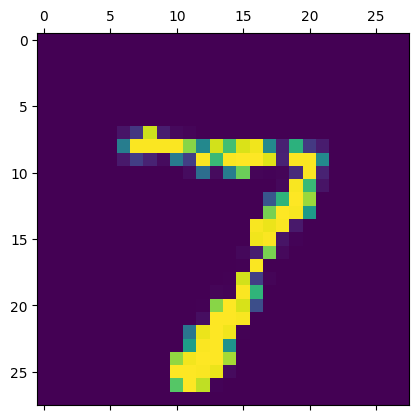

In [27]:
idx = 0
plt.matshow(x_test_adv_cw[idx])
y_pred_adv_cw = model.predict(x_test_adv_cw[idx:idx+1])
print(f"Predicted class: {y_pred_adv_cw.argmax()}")
print(f"L2 dist to original image {np.linalg.norm(x_test_adv_cw[idx] - x_test[idx],):.2f}")
plt.show()

In [28]:
loss_test, accuracy_test = model.evaluate(x_test_adv_cw, y_test[:100])
perturbation = np.mean(np.abs((x_test_adv_cw - x_test)))
l_2_perturbation = np.linalg.norm(x_test_adv_cw - x_test,axis=(1,2),)
l_2_perturbation_mean_cw = np.mean(l_2_perturbation)
print('Accuracy on adversarial test data: {:4.2f}%'.format(accuracy_test * 100))
print('Average perturbation: {:4.2f}'.format(perturbation))
print('Average l2 perturbation: {:4.2f}'.format(l_2_perturbation_mean_cw))

Accuracy on adversarial test data: 0.00%
Average perturbation: 0.03
Average l2 perturbation: 2.82


Accuracy on adversarial test data: 8.00%
Average perturbation: 0.03
Average l2 perturbation: 2.26
Predicted class: 3
L2 dist to original image 2.26


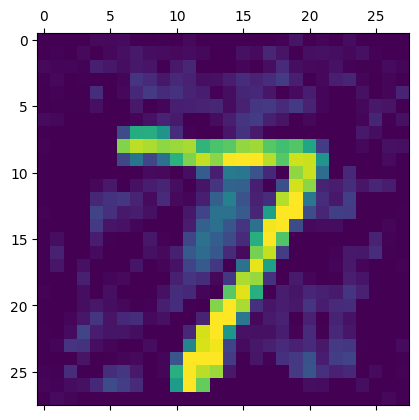

In [29]:
#4/ Generate a new FGSM attack with the same l2 perturbation as the previous CW and compare their effectiveness: i.e. %of success for similar average l2 perturbation

eps= l_2_perturbation_mean_cw
attack_fgsm = FastGradientMethod(

                         #fill missing code
                        estimator=classifier , eps = eps, norm = 2
)
x_test_adv = attack_fgsm.generate(x_test)

loss_test, accuracy_test = model.evaluate(x_test_adv, y_test)


l_2_perturbation = np.linalg.norm(x_test_adv - x_test,axis=(1,2))
l_2_perturbation_mean = np.mean(l_2_perturbation)


print('Accuracy on adversarial test data: {:4.2f}%'.format(accuracy_test * 100))
print('Average perturbation: {:4.2f}'.format(perturbation))
print('Average l2 perturbation: {:4.2f}'.format(l_2_perturbation_mean))

idx = 0
plt.matshow(x_test_adv[idx])
y_pred_adv = model.predict(x_test_adv[idx:idx+1])
print(f"Predicted class: {y_pred_adv.argmax()}")
print(f"L2 dist to original image {np.linalg.norm(x_test_adv[idx] - x_test[idx],):.2f}")
plt.show()

AutoPGD - restart:   0%|          | 0/5 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/4 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/20 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/20 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/20 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/20 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/20 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/20 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/20 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/20 [00:00<?, ?it/s]

2.72977019830514
Accuracy on adversarial test data: 2.00%
Average perturbation: 0.03
Average l2 perturbation: 2.73
Predicted class: 3
L2 dist to original image 2.65


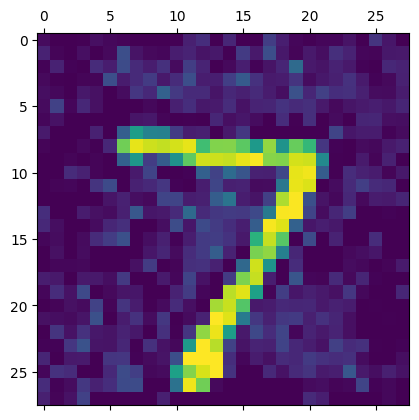

In [30]:
#5/ Generate a new APGD attack (class AutoProjectedGradientDescent) with the same (or lower) average l2 perturbation as the previous CW and FGSM, and compare their effectiveness
# to limit computation time you can set 'max_iter=10' and "nb_random_init=1", in the function arguments
eps= l_2_perturbation_mean_cw

attack_apgd = AutoProjectedGradientDescent(
         #fill missing code
         estimator=classifier ,
         max_iter=20 ,
         nb_random_init=5 ,
         eps = eps, norm = 2


)
x_test_adv_apgd = attack_apgd.generate(x_test)

loss_test, accuracy_test = model.evaluate(x_test_adv_apgd, y_test)


l_2_perturbation = np.linalg.norm(x_test_adv_apgd - x_test,axis=(1,2))
l_2_perturbation_mean = np.mean(l_2_perturbation)
print(l_2_perturbation_mean)

print('Accuracy on adversarial test data: {:4.2f}%'.format(accuracy_test * 100))
print('Average perturbation: {:4.2f}'.format(perturbation))
print('Average l2 perturbation: {:4.2f}'.format(l_2_perturbation_mean))
idx = 0
plt.matshow(x_test_adv_apgd[idx])
y_pred_adv_apgd = model.predict(x_test_adv_apgd[idx:idx+1])
print(f"Predicted class: {y_pred_adv_apgd.argmax()}")
print(f"L2 dist to original image {np.linalg.norm(x_test_adv_apgd[idx] - x_test[idx],):.2f}")
plt.show()

In [37]:
#5bis/ /!\ OPTIONAL CHALLENGE: find an adversarial attack in the same library (https://adversarial-robustness-toolbox.readthedocs.io/en/latest/modules/attacks/evasion.html)
#having better results with the SAME l2 perturbation

from art.attacks.evasion import ProjectedGradientDescent
from art.estimators.classification import KerasClassifier

# Assuming 'model' is your pre-trained Keras model
classifier = KerasClassifier(model=model, clip_values=(0, 1))

# Now create the PGD attack with L2 norm and the same eps
attack_pgd = ProjectedGradientDescent(
    estimator=classifier,
    norm=2,  # L2 norm constraint
    eps=eps,  # Same L2 perturbation as before
    eps_step=eps/10,  # Step size (can be tuned)
    max_iter=100,  # Number of iterations
    targeted=False  # Set to True if it's a targeted attack
)

# Generate adversarial examples
x_adv = attack_pgd.generate(x=x_test)



PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

# Part 4: Transfer attacks

In [38]:
classifier_source = KerasClassifier(model=model2, clip_values=(0, 1))
classifier_target = KerasClassifier(model=model, clip_values=(0, 1))

attack_fgsm = FastGradientMethod(estimator=classifier_source, eps=16/255, norm=np.inf)

In [39]:
x_transfer_adv = attack_fgsm.generate(x_test)

In [40]:
perturbation = np.mean(np.abs((x_transfer_adv - x_test)))
loss_source, accuracy_source = model2.evaluate(x_transfer_adv, y_test)
loss_target, accuracy_target = model.evaluate(x_transfer_adv, y_test)

print('Average perturbation: {:4.2f}'.format(perturbation))
print('Accuracy on adversarial test data for source model: {:4.2f}%'.format(accuracy_source * 100))
print('Accuracy on adversarial test data for target model: {:4.2f}%'.format(accuracy_target * 100))

Average perturbation: 0.04
Accuracy on adversarial test data for source model: 52.00%
Accuracy on adversarial test data for target model: 76.00%


In [41]:
#6/ Compare the transferability of the attack when using the norm 2 and eps=0.3

In [42]:
attack_fgsm = FastGradientMethod(estimator=classifier_source, eps=0.3, norm=2)

In [43]:
x_transfer_adv = attack_fgsm.generate(x_test)

In [44]:
perturbation = np.mean(np.abs((x_transfer_adv - x_test)))
loss_source, accuracy_source = model2.evaluate(x_transfer_adv, y_test)
loss_target, accuracy_target = model.evaluate(x_transfer_adv, y_test)

print('Average perturbation: {:4.2f}'.format(perturbation))
print('Accuracy on adversarial test data for source model: {:4.2f}%'.format(accuracy_source * 100))
print('Accuracy on adversarial test data for target model: {:4.2f}%'.format(accuracy_target * 100))

Average perturbation: 0.01
Accuracy on adversarial test data for source model: 92.00%
Accuracy on adversarial test data for target model: 98.00%


# Part 5: Adversarial Attack defenses

## Adversarial training

In [45]:
from art import config
from keras.models import load_model
from art.utils import get_file, load_dataset

(x_train, y_train), (x_test, y_test), min_, max_ = load_dataset('mnist')


In [46]:
path = get_file('mnist_cnn_original.h5', extract=False, path=config.ART_DATA_PATH,
                url='https://www.dropbox.com/s/p2nyzne9chcerid/mnist_cnn_original.h5?dl=1')
classifier_model = load_model(path)
classifier = KerasClassifier(clip_values=(min_, max_), model=classifier_model, use_logits=False)

In [47]:
classifier_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [48]:
x_test_pred = np.argmax(classifier.predict(x_test), axis=1)
nb_correct_pred = np.sum(x_test_pred == np.argmax(y_test, axis=1))

print("Original test data:")
print("Correctly classified: {}".format(nb_correct_pred))
print("Incorrectly classified: {}".format(len(x_test)-nb_correct_pred))
print("Accuracy: {}".format(nb_correct_pred/len(x_test)*100))

Original test data:
Correctly classified: 9842
Incorrectly classified: 158
Accuracy: 98.42


In [49]:
attacker = FastGradientMethod(classifier, eps=0.5)
x_test_adv = attacker.generate(x_test, y_test)

In [50]:
x_test_adv_pred = np.argmax(classifier.predict(x_test_adv), axis=1)
nb_correct_adv_pred = np.sum(x_test_adv_pred == np.argmax(y_test, axis=1))

print("Adversarial test data:")
print("Correctly classified: {}".format(nb_correct_adv_pred))
print("Incorrectly classified: {}".format(len(x_test_adv)-nb_correct_adv_pred))
print("Accuracy: {}".format(nb_correct_adv_pred/len(x_test_adv)*100))

Adversarial test data:
Correctly classified: 31
Incorrectly classified: 9969
Accuracy: 0.31


In [51]:
path = get_file('mnist_cnn_robust.h5', extract=False, path=config.ART_DATA_PATH,
                url='https://www.dropbox.com/s/yutsncaniiy5uy8/mnist_cnn_robust.h5?dl=1')
robust_classifier_model = load_model(path)
robust_classifier = KerasClassifier(clip_values=(min_, max_), model=robust_classifier_model, use_logits=False)

In [52]:
robust_classifier_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)             

In [53]:
x_test_robust_pred = np.argmax(robust_classifier.predict(x_test), axis=1)
nb_correct_robust_pred = np.sum(x_test_robust_pred == np.argmax(y_test, axis=1))

print("Original test data:")
print("Correctly classified: {}".format(nb_correct_robust_pred))
print("Incorrectly classified: {}".format(len(x_test)-nb_correct_robust_pred))
print("Accuracy: {}".format(nb_correct_robust_pred/len(x_test)*100))

Original test data:
Correctly classified: 9736
Incorrectly classified: 264
Accuracy: 97.36


In [54]:
attacker_robust = FastGradientMethod(robust_classifier, eps=0.5)
x_test_adv_robust = attacker_robust.generate(x_test, y_test)

In [55]:
x_test_adv_robust_pred = np.argmax(robust_classifier.predict(x_test_adv_robust), axis=1)
nb_correct_adv_robust_pred = np.sum(x_test_adv_robust_pred == np.argmax(y_test, axis=1))

print("Adversarial test data:")
print("Correctly classified: {}".format(nb_correct_adv_robust_pred))
print("Incorrectly classified: {}".format(len(x_test_adv_robust)-nb_correct_adv_robust_pred))
print("Accuracy: {}".format(nb_correct_adv_robust_pred/len(x_test_adv_robust)*100))

Adversarial test data:
Correctly classified: 1383
Incorrectly classified: 8617
Accuracy: 13.83


### Against stronger attacks: PGD

In [56]:
from art.attacks.evasion import ProjectedGradientDescent
attacker_pgd = ProjectedGradientDescent(estimator=classifier, eps=0.5, eps_step=0.01, max_iter=100, verbose=False)
attacker_robust_pgd = ProjectedGradientDescent(estimator=robust_classifier, eps=0.5, eps_step=0.01, max_iter=100, verbose=False)

In [57]:
eps_range = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
eps_range = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
nb_correct_original = []
nb_correct_robust = []

nb_samples = 100

for eps in eps_range:
    print("Running eps {}".format(eps))
    attacker_pgd.set_params(**{'eps': eps})
    attacker_robust_pgd.set_params(**{'eps': eps})
    x_test_adv = attacker_pgd.generate(x_test[:nb_samples], y_test[:nb_samples])
    x_test_adv_robust = attacker_robust_pgd.generate(x_test[:nb_samples], y_test[:nb_samples])

    x_test_adv_pred = np.argmax(classifier.predict(x_test_adv), axis=1)
    nb_correct_original += [np.sum(x_test_adv_pred == np.argmax(y_test[:nb_samples], axis=1)) / nb_samples]

    x_test_adv_robust_pred = np.argmax(robust_classifier.predict(x_test_adv_robust), axis=1)
    nb_correct_robust += [np.sum(x_test_adv_robust_pred == np.argmax(y_test[:nb_samples], axis=1)) / nb_samples]

eps_range = [0] + eps_range
nb_correct_original = [nb_correct_pred / 10000] + nb_correct_original
nb_correct_robust = [nb_correct_robust_pred / 10000] + nb_correct_robust



Running eps 0.05
Running eps 0.1
Running eps 0.2
Running eps 0.3
Running eps 0.4
Running eps 0.5
Running eps 0.6


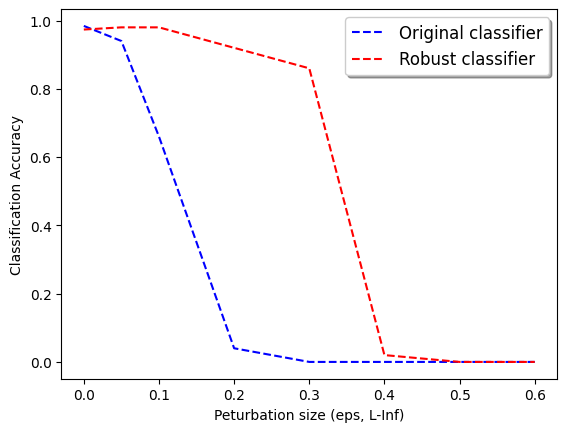

In [58]:
fig, ax = plt.subplots()
ax.plot(np.array(eps_range), np.array(nb_correct_original), 'b--', label='Original classifier')
ax.plot(np.array(eps_range), np.array(nb_correct_robust), 'r--', label='Robust classifier')

legend = ax.legend(loc='upper right', shadow=True, fontsize='large')

plt.xlabel('Peturbation size (eps, L-Inf)')
plt.ylabel('Classification Accuracy')
plt.show()

In [59]:
#8/ What happens when we reduce the number of max_iter to 10 ? Which model becomes better?